# What is the most optimal skill to learn for Data Scientists?
#### Methodology
1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percentage skill demand
3. Determine if certain technologies are more prevalent

In [31]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import ast
from adjustText import adjust_text

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Use ast.literal_eval to convert a list with a string type into a list type

In [21]:
df.tail()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,"[aws, flow]","{'cloud': ['aws'], 'other': ['flow']}"


In [7]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

In [14]:
df_DS_US.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4553 entries, 100 to 785692
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        4553 non-null   object        
 1   job_title              4553 non-null   object        
 2   job_location           4498 non-null   object        
 3   job_via                4553 non-null   object        
 4   job_schedule_type      4550 non-null   object        
 5   job_work_from_home     4553 non-null   bool          
 6   search_location        4553 non-null   object        
 7   job_posted_date        4553 non-null   datetime64[ns]
 8   job_no_degree_mention  4553 non-null   bool          
 9   job_health_insurance   4553 non-null   bool          
 10  job_country            4553 non-null   object        
 11  salary_rate            4553 non-null   object        
 12  salary_year_avg        4553 non-null   float64       
 13  sala

In [11]:
df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])
df_DS_US_exploded = df_DS_US.explode('job_skills')
df_DS_US_exploded[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
100,228222.0,sql
100,228222.0,r
100,228222.0,python
100,228222.0,express
116,114000.0,r


In [27]:
df_DS_skills = df_DS_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DS_skills = df_DS_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
DS_job_count = len(df_DS_US)
df_DS_skills['skill_percent'] = df_DS_skills['skill_count'] / DS_job_count * 100
df_DS_skills

,skill_count,median_salary,skill_percent
job_skills,,,
python,3358,131867.0,73.753569
sql,2463,134500.0,54.096200
r,2053,126000.0,45.091149
sas,1022,120000.0,22.446738
tableau,989,125000.0,21.721942
...,...,...,...
svelte,1,99150.0,0.021964
lisp,1,100000.0,0.021964
macos,1,147000.0,0.021964


In [30]:
skill_percent = 10
df_DS_skills_high_demand = df_DS_skills[df_DS_skills['skill_percent'] > skill_percent]
df_DS_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
python,3358,131867.0,73.753569
sql,2463,134500.0,54.096200
r,2053,126000.0,45.091149
sas,1022,120000.0,22.446738
tableau,989,125000.0,21.721942
aws,768,134000.0,16.867999
spark,718,135959.5,15.769822
excel,490,124290.0,10.762135
tensorflow,474,149646.0,10.410718


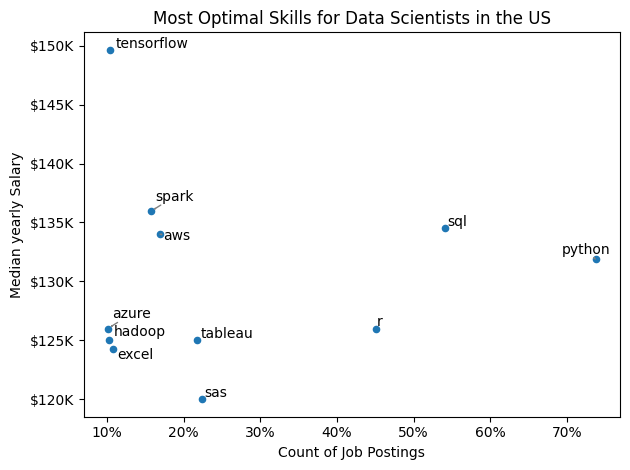

In [34]:
df_DS_skills_high_demand.plot(kind='scatter',
                              x='skill_percent',
                              y='median_salary')
texts=[]
for i, txt in enumerate(df_DS_skills_high_demand.index):
    texts.append(plt.text(df_DS_skills_high_demand['skill_percent'].iloc[i],
                          df_DS_skills_high_demand['median_salary'].iloc[i],
                          txt
                          ))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median yearly Salary')
plt.title('Most Optimal Skills for Data Scientists in the US')

ax = plt.gca()
ticks_x = plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
ax.yaxis.set_major_formatter(ticks_x)
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

In [35]:
df['job_type_skills'].head()

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
Name: job_type_skills, dtype: object

In [38]:
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in technology_dict, add value
            technology_dict[key] += value
        else: # if key does not exists in technology_dict, add key and value
            technology_dict[key] = value

for key, value in technology_dict.items(): #remove duplicates by converting values to set then to list
    technology_dict[key] = list(set(value))

technology_dict['cloud']

['colocation',
 'watson',
 'bigquery',
 'heroku',
 'databricks',
 'linode',
 'ovh',
 'azure',
 'digitalocean',
 'oracle',
 'aws',
 'aurora',
 'ibm cloud',
 'snowflake',
 'gcp',
 'vmware',
 'redshift',
 'firebase',
 'openstack']

In [39]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,qlik
0,analyst_tools,ssis
0,analyst_tools,visio
0,analyst_tools,spss
0,analyst_tools,spreadsheet
...,...,...
9,sync,google chat
9,sync,microsoft teams
9,sync,ringcentral
9,sync,twilio


In [41]:
df_plot = df_DS_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,3358,131867.0,73.753569,programming,python
1,2463,134500.0,54.096200,programming,sql
2,2053,126000.0,45.091149,programming,r
3,1022,120000.0,22.446738,analyst_tools,sas
4,1022,120000.0,22.446738,programming,sas
5,989,125000.0,21.721942,analyst_tools,tableau
6,768,134000.0,16.867999,cloud,aws
7,718,135959.5,15.769822,libraries,spark
8,490,124290.0,10.762135,analyst_tools,excel
9,474,149646.0,10.410718,libraries,tensorflow


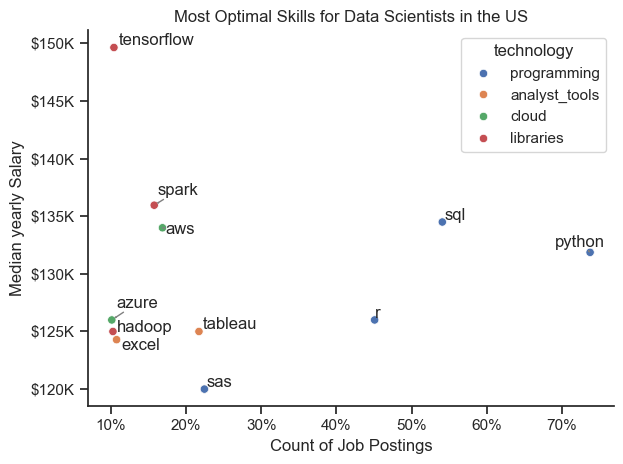

In [46]:
sns.set_theme(style='ticks')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology',
)
sns.despine()
texts=[]
for i, txt in enumerate(df_DS_skills_high_demand.index):
    texts.append(plt.text(df_DS_skills_high_demand['skill_percent'].iloc[i],
                          df_DS_skills_high_demand['median_salary'].iloc[i],
                          txt
                          ))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median yearly Salary')
plt.title('Most Optimal Skills for Data Scientists in the US')

ax = plt.gca()
ticks_x = plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
ax.yaxis.set_major_formatter(ticks_x)
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()